This project was inspired by the work of Dr. Haulder on Non-Performing Asset detection. His project provided a valuable learning foundation, which I adapted and built upon to deepen my understanding on data-driven loan risk analysis.

The project is divided into the following stages:

    1. First Stage
    2. Second Stage
    3. Third Stage
    4. Fourth Stage
    5. Fifth Stage

## First Stage - Data Loading, Exploration & Feature Understanding

    In the first stage, we begin by importing all of the necessary Python libraries for data manipulation, visualisation, and analysis. We then will load the loan dataset (CSV file) into a DataFrame for processing.

    Next, we will explore the dataset by checking:
        - Data types of each column
        - The size and shape of the dataset
        - Any missing values
    
    We visualise the key columns using histograms and count plots for understanding the distributions that occur.

    The goal is to predict loan defaults, therefore we create a new column called 'Risk_Flag', where:
        - '1' is assigned to defaulters
        - '0' is assigned to non-defaulters
    
    We also:
        - Seperate the features into categorical and numerical types
        - Identify missing data to then later clean
        - Begin basic feature engineering, such as 'loan_to_income_ratio'
    
    This stage sets up the dataset for deeper analysis and modelling in the next steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

df = pd.read_csv('training-data.csv')

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [2]:
print("Shape of dataset:", df.shape)
df.info()
df.isnull().sum()

Shape of dataset: (252000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [3]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


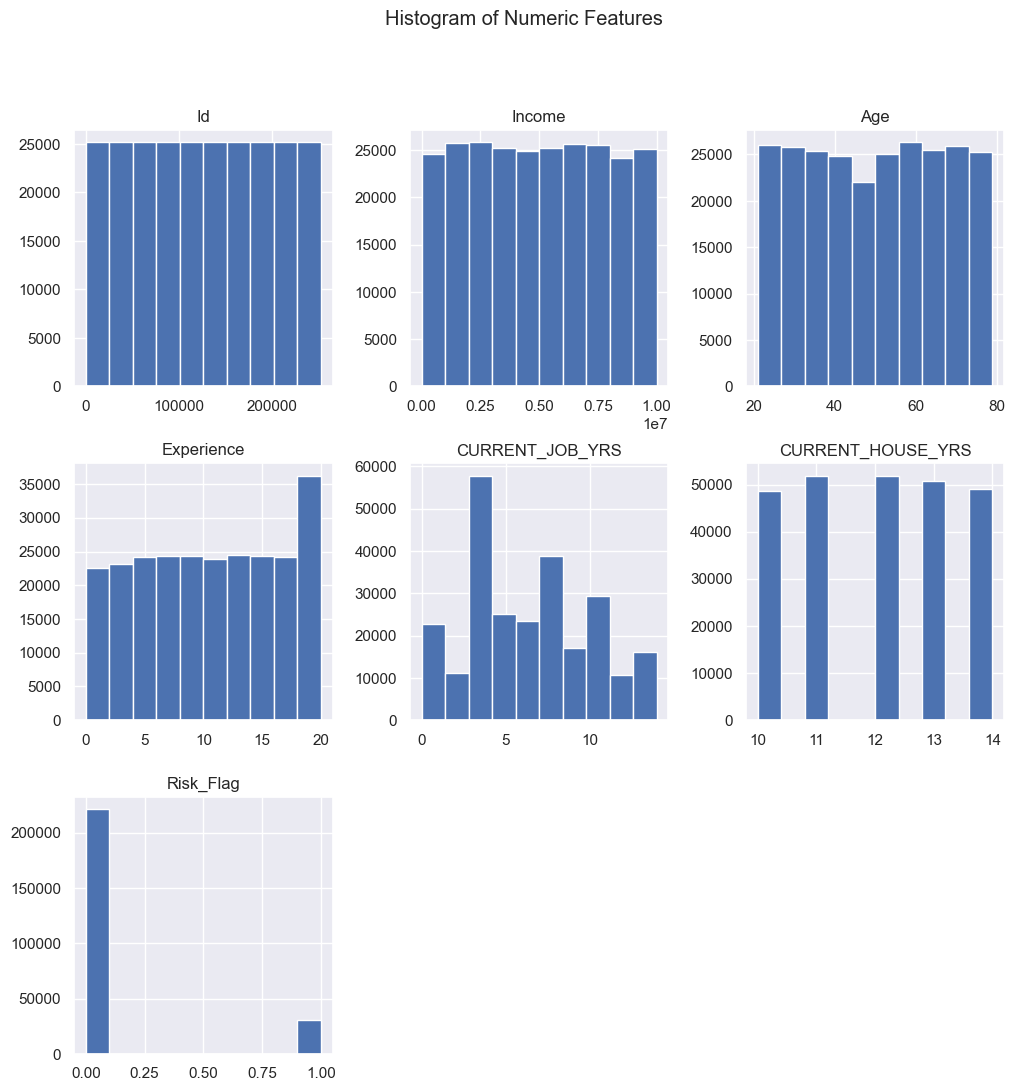

In [4]:
print(df.columns)

df.hist(figsize=(12, 12))
plt.suptitle("Histogram of Numeric Features")
plt.show()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64


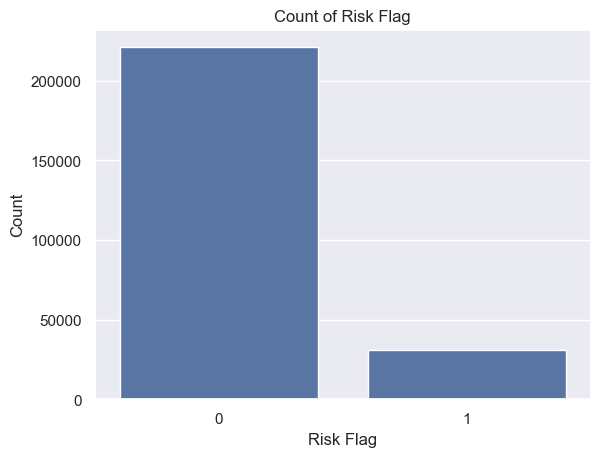

In [5]:
print(df['Risk_Flag'].value_counts())

sns.countplot(x='Risk_Flag', data=df)
plt.title("Count of Risk Flag")
plt.xlabel("Risk Flag")
plt.ylabel("Count")
plt.show()

Married/Single
single     226272
married     25728
Name: count, dtype: int64


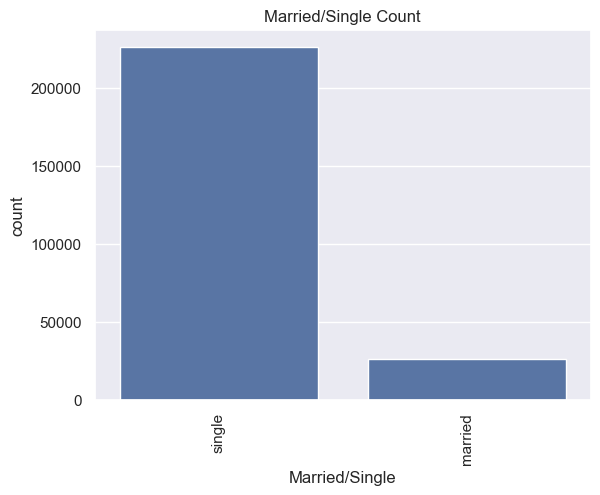

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


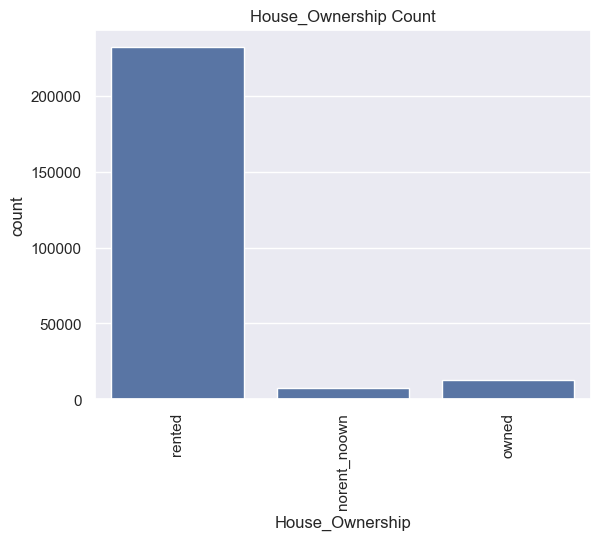

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64


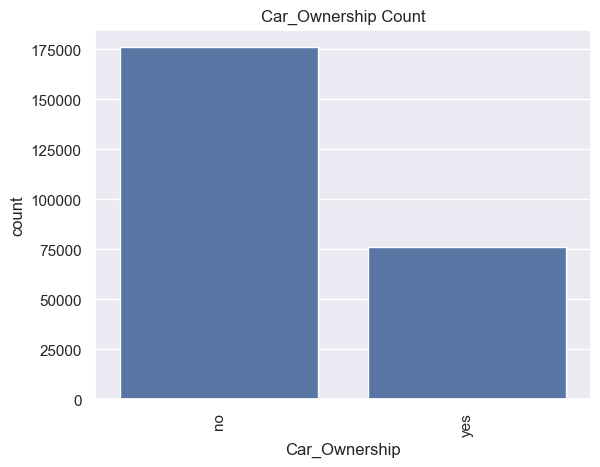

In [6]:
def explore_categorical(feature):
    print(df[feature].value_counts())
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Count')
    plt.xticks(rotation=90)
    plt.show()

categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']
for col in categorical_cols:
    explore_categorical(col)

In [7]:
print(f"Unique States: {df['STATE'].nunique()}")
print(df['STATE'].value_counts())

print(f"Unique Professions: {df['Profession'].nunique()}")
print(df['Profession'].value_counts())


Unique States: 29
STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64
Unique Professions: 51
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                

## Second Stage - Exploratory Data Analysis and Feature Relationships

In this stage, we will perform Exploratory Data Analysis (EDA) to understand the relationships and dependencies between different features in the dataset. We analyse how key variables interact with the target variable (Risk_Flag) and among themselves, helping us identify important patterns, correlations, and potential predictors for loan default. Visualisations such as count plots and box plots are used to reveal theses insights.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

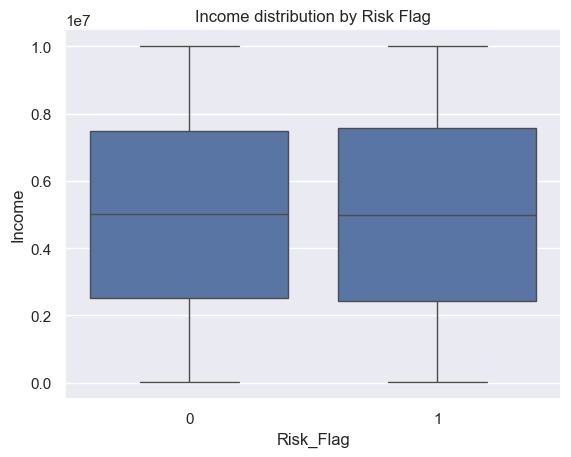

In [9]:
sns.boxplot(x='Risk_Flag', y='Income', data=df)
plt.title("Income distribution by Risk Flag")
plt.show()

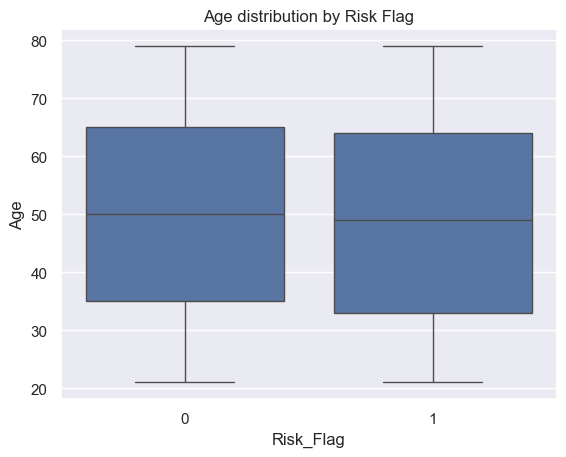

In [10]:
sns.boxplot(x="Risk_Flag", y="Age", data=df)
plt.title("Age distribution by Risk Flag")
plt.show()

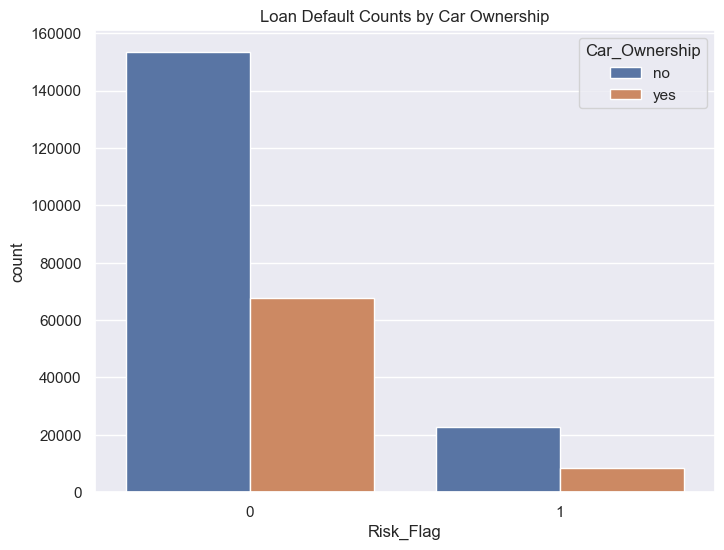

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Risk_Flag", hue="Car_Ownership", data=df, ax=ax)
plt.title("Loan Default Counts by Car Ownership")
plt.show()

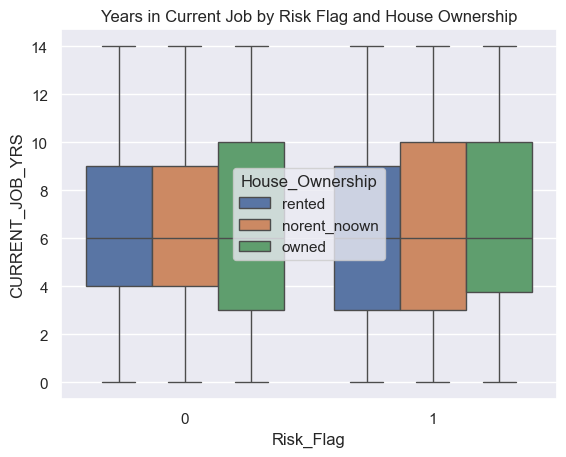

In [12]:
sns.boxplot(x="Risk_Flag", y="CURRENT_JOB_YRS", hue="House_Ownership", data=df)
plt.title("Years in Current Job by Risk Flag and House Ownership")
plt.show()

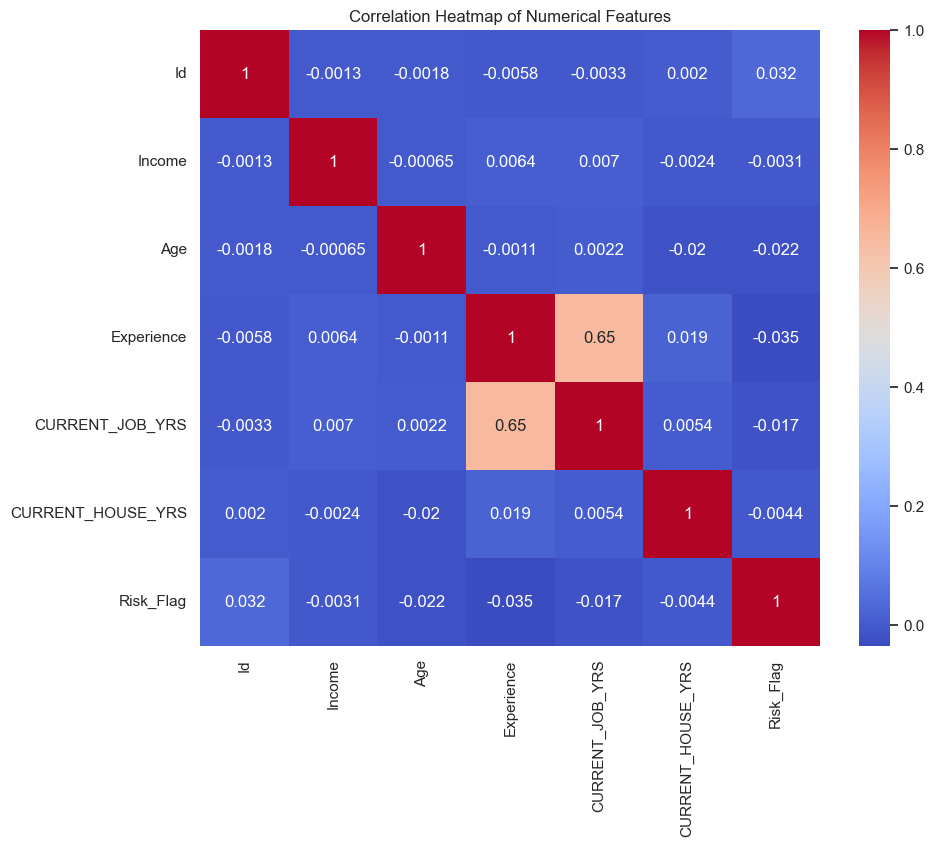

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('training-data.csv')

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

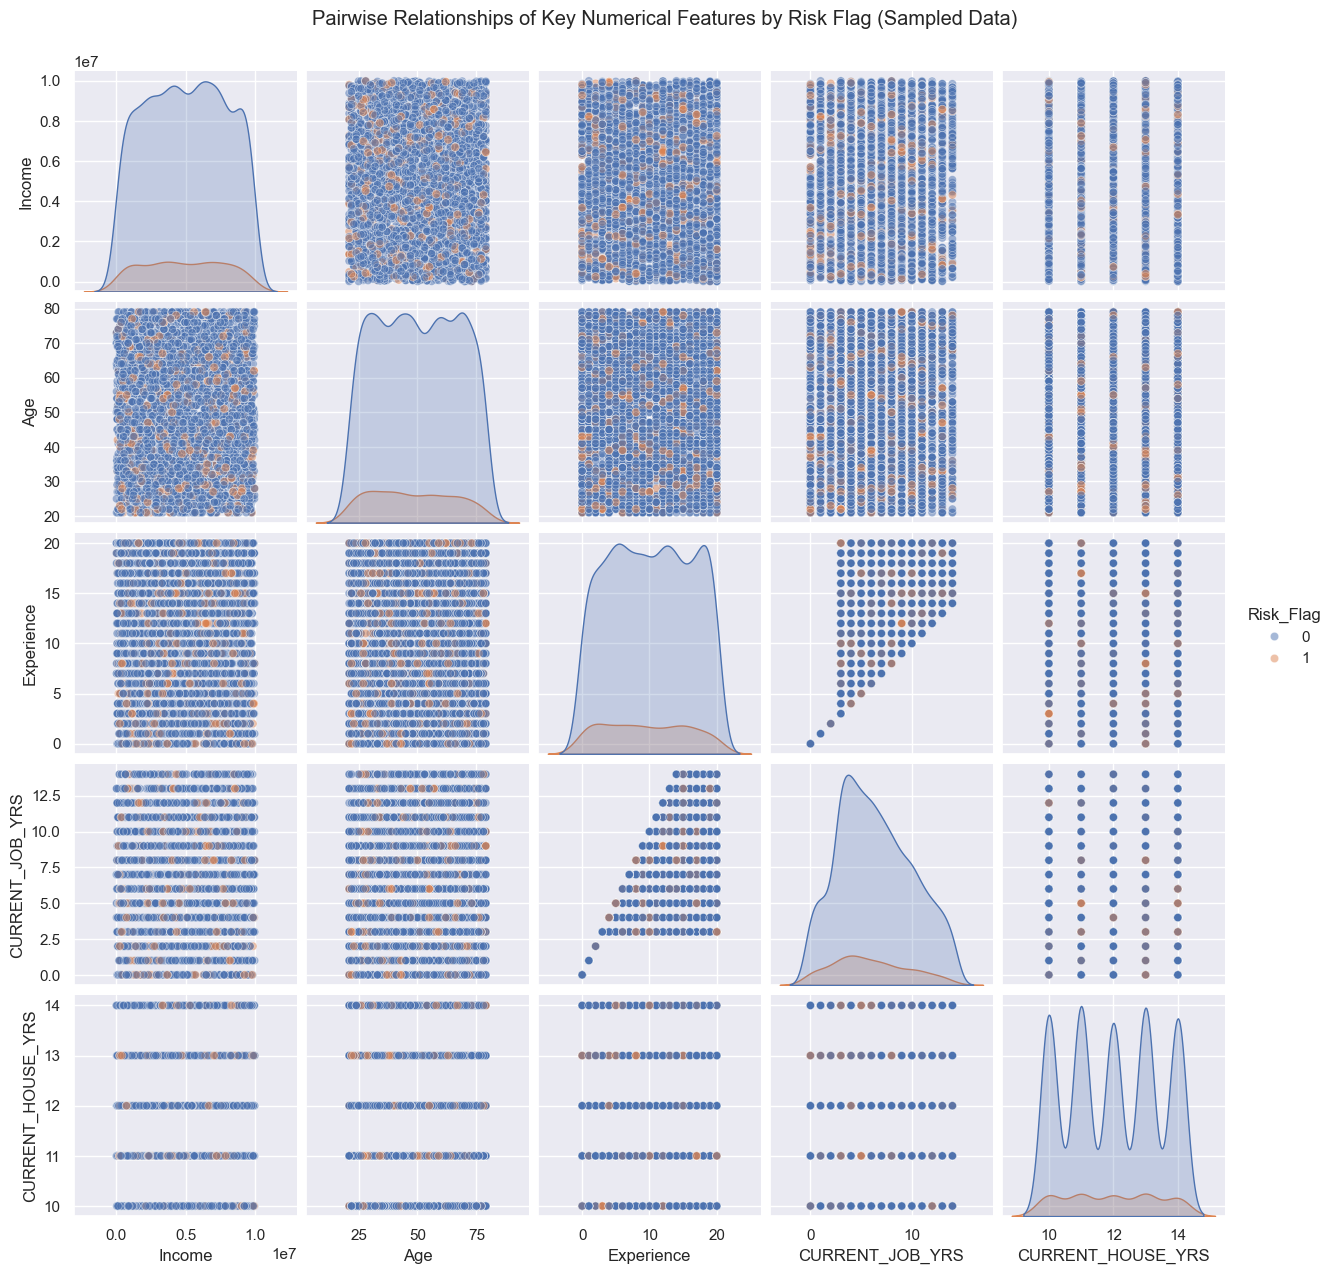

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('training-data.csv')

sample_df = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']].sample(5000, random_state=42)

sns.pairplot(sample_df, hue='Risk_Flag', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationships of Key Numerical Features by Risk Flag (Sampled Data)", y=1.02)
plt.show()


## Third Stage - Encoding Categorical Variables & Data Splitting

In this stage, our goal is to convert categorical columns from string types to numeric types so that the machine learning models can work with them effectively. We will use different encoding techniques such as Label Encoding, One-Hot Encoding, and Count Encoding depending on the nature of the variables.

To do this, we will use the following Python packages:
    - LabelEncoder and OneHotEncoder from sklearn.preprocessing
    category_encoders for additional encoding methods like Count Encoding

Finally, we will split the dataset into training and testing using train_test_split from sklearn.model_selection.

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Married/Single', 'Car_Ownership']:
    df[col] = label_encoder.fit_transform(df[col])

In [17]:
%pip install --upgrade category_encoders scipy

# After running this cell, please restart the kernel and re-run the notebook from the top.

import category_encoders as ce

top_features = ['Profession', 'STATE', 'CITY']
count_encoder = ce.CountEncoder()
count_encoded_df = count_encoder.fit_transform(df[top_features])

df = df.join(count_encoded_df.add_suffix('_count'))

df.drop(top_features, axis=1, inplace=True)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (c:\Users\slend\credit-risk-bayesian-model\venv\Lib\site-packages\scipy\_lib\_util.py)

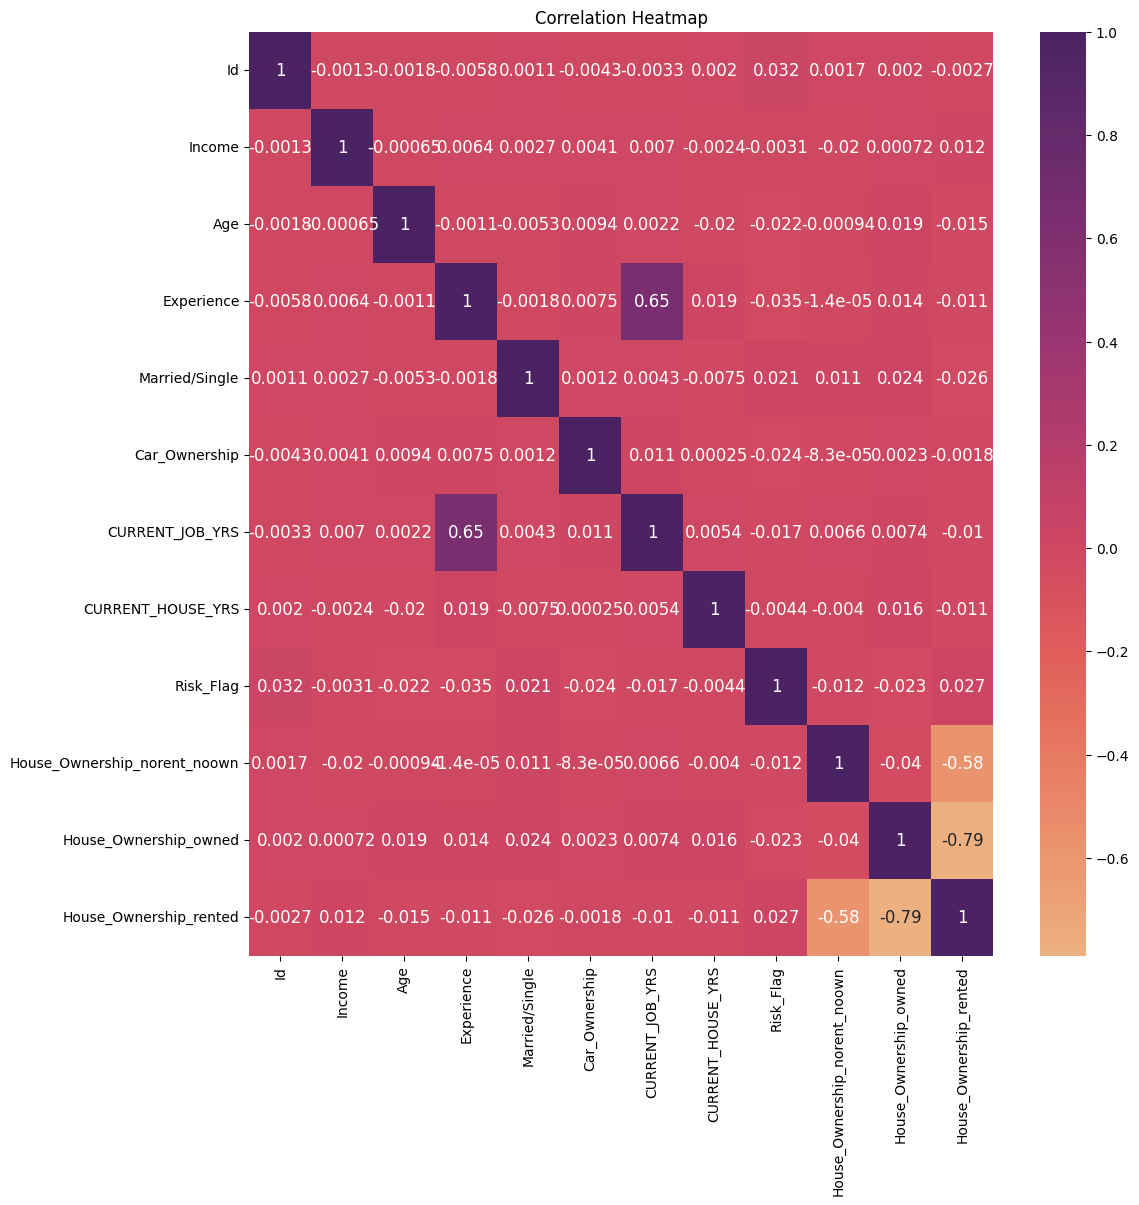

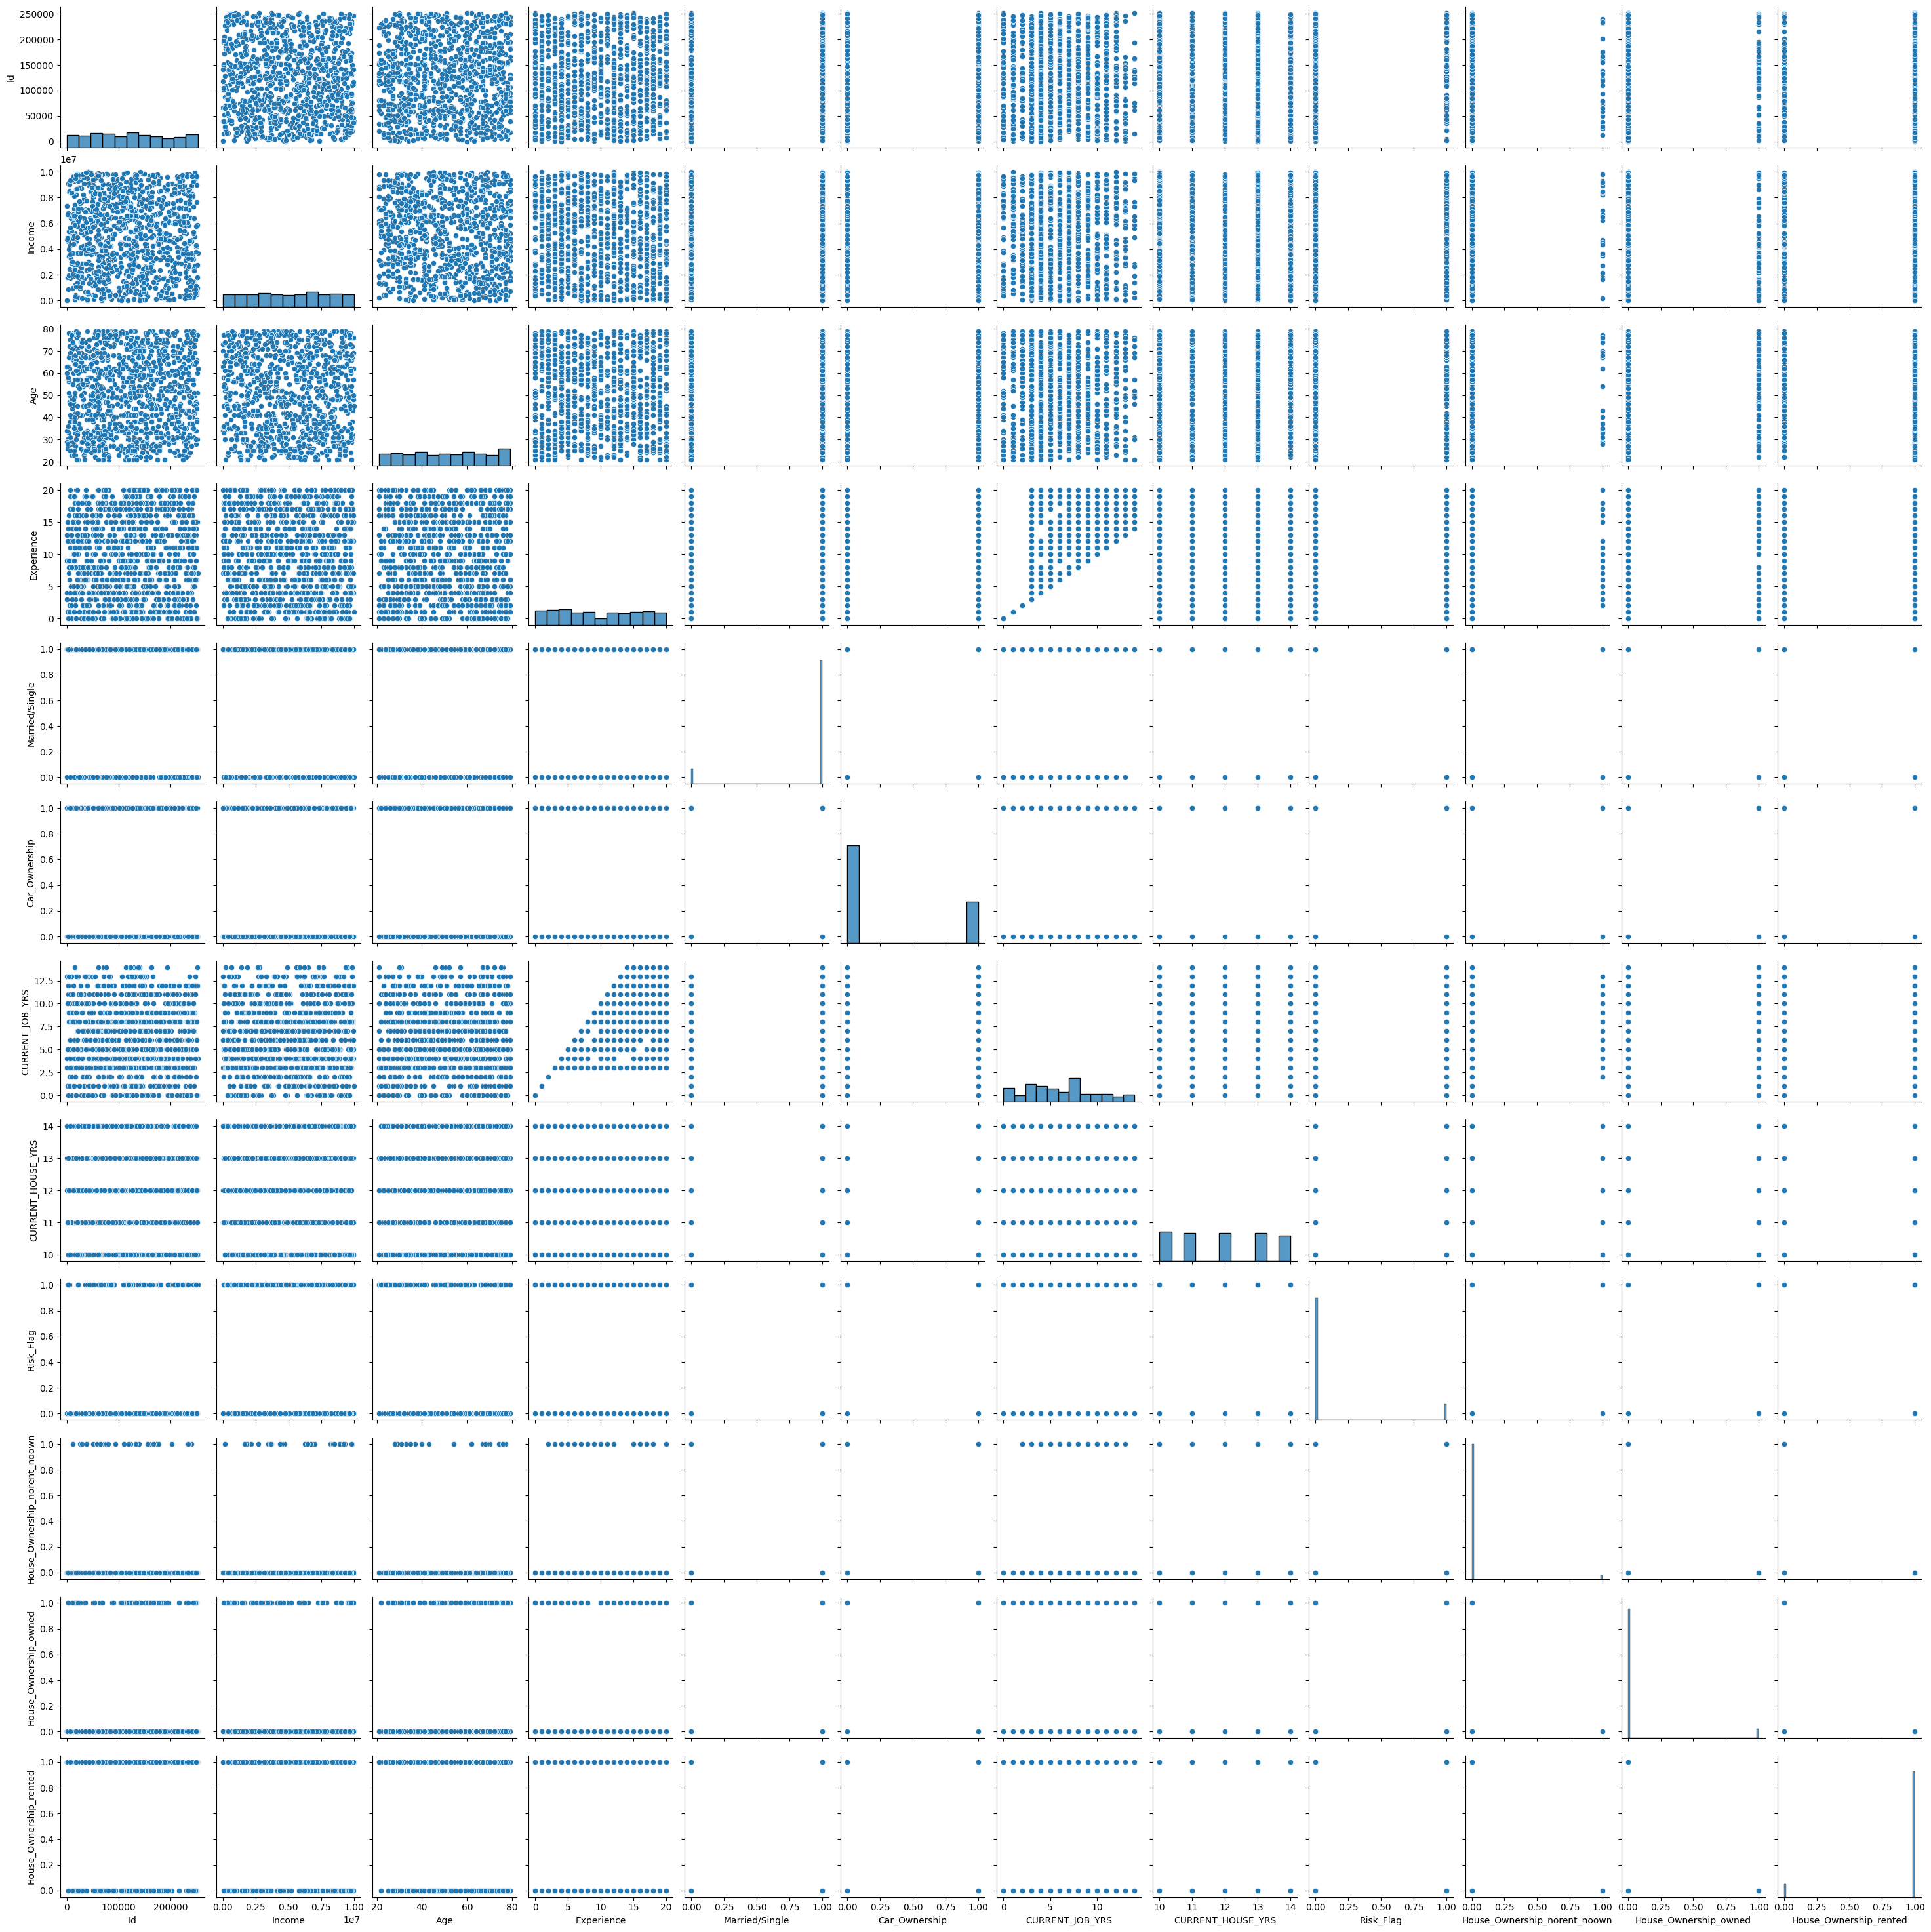

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 12))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare', annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.show()

# Sample a subset of the data for pairplot (e.g., 1000 rows)
sampled_df = numeric_df.sample(n=1000, random_state=42)
sns.pairplot(sampled_df)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=7
)

## Fourth Stage - Model Training, Oversampling and Evalutation Pipeline

In this stage, we will build and evaluate a machine learning pipeline to predict loan risk using the preprocessed dataset.

We will use:
    - Random Forest Classifier as our core model
    - SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset
    - Pipeline to streamline preprocessing, oversampling, and model fitting in a single step

We also add:
    - Cross-validation to validate generalisation
    - Classification report and confusion matrix to assess performance

Random Forest is an ensemble method that builds multiple decision trees and aggregates their predictions. For classification tasks, it outputs the class that receives the most votes. This helps reduce overfitting and handles noisy data well, even when the dataset has high variance.

Since our dataset is likely imbalanced (many more "good" loans than "risky" ones), we apply SMOTE to synthetically create more examples of the minority class by interpolating between similar examples, which prevents overfitting compared to random oversampling.

A Pipeline allows us to combine multiple steps (like SMOTE + training) into a single clean structure. This ensures that SMOTE is applied only to the training data, not the test data (which would cause data leakage).

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


Dataset shape: (252000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  int32 
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  int32 
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int32(2), int64(7), object(4)
memory usage: 23.1+ MB
None
Class distribution:
 Risk_Flag
0    221004
1     30996
Name: count, dtype: 

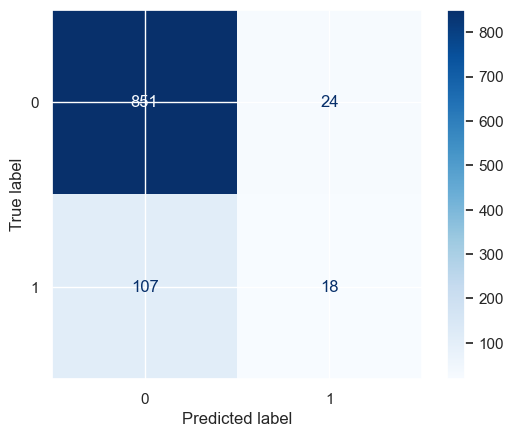

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

print("Dataset shape:", df.shape)
print(df.info())
print("Class distribution:\n", df['Risk_Flag'].value_counts())

MAX_ROWS = 5000
if len(df) > MAX_ROWS:
    print(f"Sampling down to {MAX_ROWS} rows for faster training...")
    df_sample = df.sample(MAX_ROWS, random_state=42)
else:
    df_sample = df.copy()

X = df_sample.drop('Risk_Flag', axis=1)
y = df_sample['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=7
)

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

print("Starting preprocessing...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Preprocessing done.")

print("Starting SMOTE oversampling...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
print(f"After SMOTE, training set size: {X_train_resampled.shape}")

print("Training RandomForestClassifier...")
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

y_pred = rf.predict(X_test_processed)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')


In [33]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC

categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

model_pipeline = ImbPipeline([
	('preprocessor', preprocessor),
	('oversample', SMOTENC(categorical_features=categorical_indices, random_state=42)),
	('rf', RandomForestClassifier(random_state=42))
])

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"✅ Cross-validation Accuracy (5-fold): {cv_scores.mean():.4f}")


✅ Cross-validation Accuracy (5-fold): 0.8738


## Fifth Stage - Model Evaluation & Interpretation 

In this stage, we thoroughly evaluate the trained machine learning model to understand its predictive performance and practical utility. This involves computing key classification metrics such as precision, recall, F1-score, and accuracy, alongside visualizing results through confusion matrices, ROC and Precision-Recall curves, and analyzing feature importance. Such insights not only quantify model effectiveness but also highlight areas for improvement and provide interpretability to stakeholders.

To deepen our understanding, we extend the evaluation with calibration curves to assess probability estimates, learning curves to detect overfitting or underfitting, and cross-validation scores for robustness. Additionally, advanced model interpretability tools like SHAP explain individual feature contributions, helping explain model decisions transparently.

By expanding beyond simple accuracy, we better understand how the model handles class imbalance and the trade-offs between false positives and false negatives—critical in risk prediction domains like credit default. This comprehensive approach ensures that the model’s predictions are both reliable and actionable in real-world financial decision-making.

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     44147
           1       0.57      0.55      0.56      6253

    accuracy                           0.89     50400
   macro avg       0.75      0.75      0.75     50400
weighted avg       0.89      0.89      0.89     50400

🧮 Confusion Matrix:


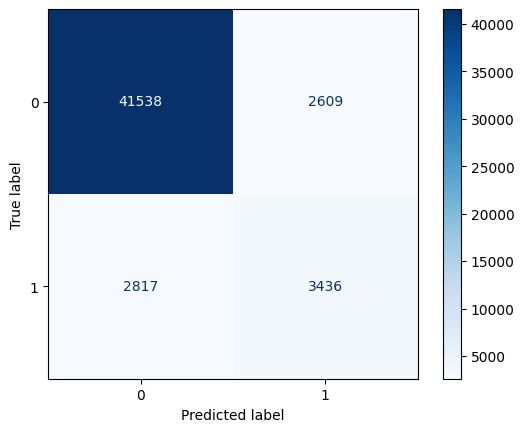

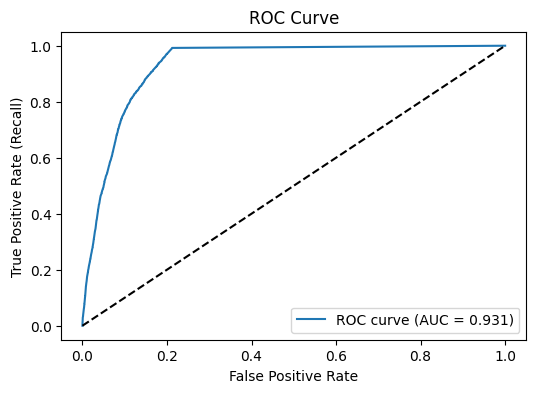

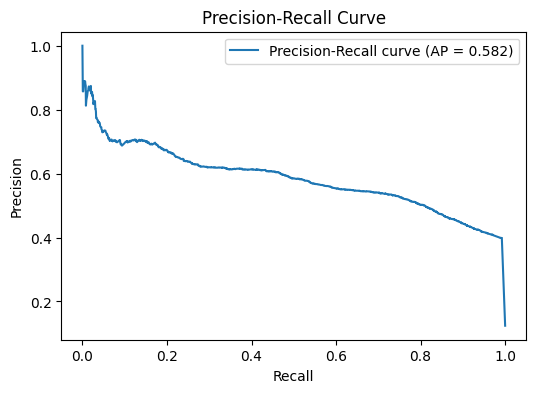

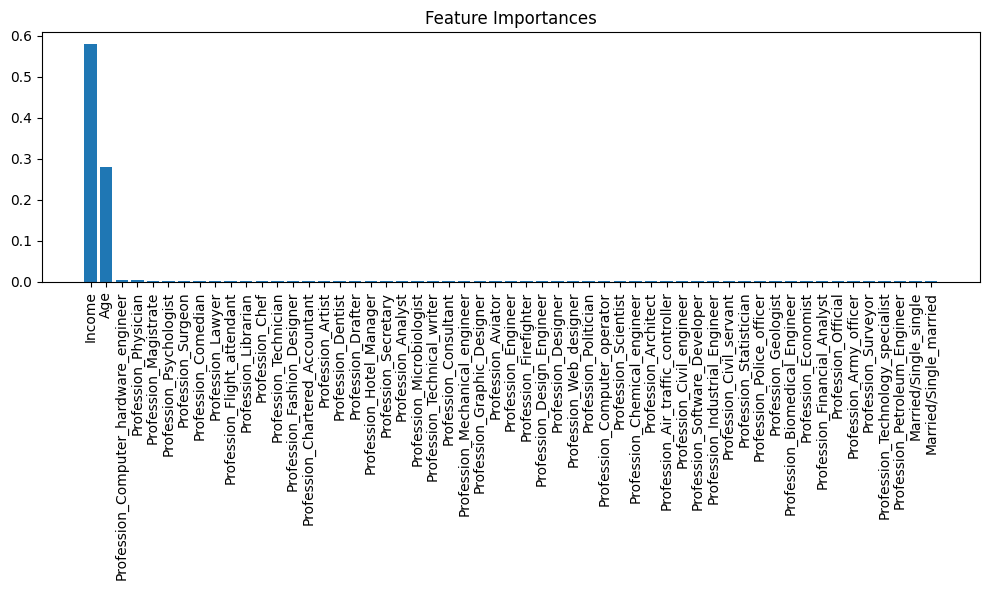

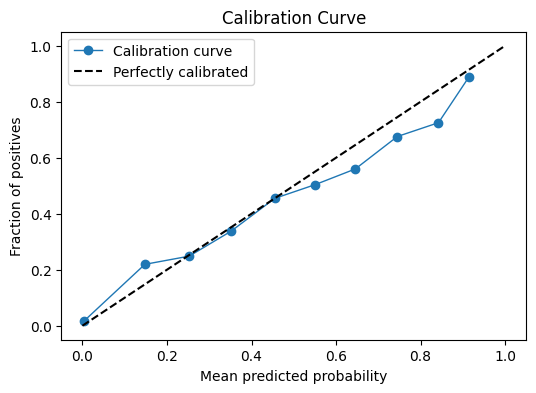

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
import shap

import pandas as pd

# Load your DataFrame here. Replace the file path with your actual data source.
# Example: df = pd.read_csv('your_data.csv')
df = pd.read_csv('training-data.csv')  # <-- Set your actual file path here

# Update features and column names to match DataFrame columns
features = ['Age', 'Income', 'Married/Single', 'Profession']
target = 'Risk_Flag'

X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Define your numeric and categorical columns to match DataFrame
numeric_cols = ['Age', 'Income']
categorical_cols = ['Married/Single', 'Profession']

# Preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Create the pipeline with a classifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.named_steps['rf'].classes_)
disp.plot(cmap='Blues')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

rf = model_pipeline.named_steps['rf']
preprocessor = model_pipeline.named_steps['preprocessor']
feature_names_num = numeric_cols
feature_names_cat = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numeric_cols, feature_names_cat])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration curve')
plt.plot([0,1], [0,1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

train_sizes, train_scores, val_scores = learning_curve(
    model_pipeline, X_train, y_train, cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

rf = model_pipeline.named_steps['rf']
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean CV ROC AUC Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Sample only 50–100 rows for SHAP
X_sample = X_test[:100]

# Apply preprocessing
X_sample_transformed = preprocessor.transform(X_sample)
if hasattr(X_sample_transformed, "toarray"):
    X_sample_transformed = X_sample_transformed.toarray()

# Get classifier again (correct name!)
rf = model_pipeline.named_steps['rf']

# SHAP explainer + values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_sample_transformed)

# SHAP summary plot
shap.summary_plot(shap_values[1], X_sample_transformed, feature_names=feature_names, plot_type="bar")



## Summary of Extensions
- Added multiple classifiers and compared their results.
- Applied advanced balancing techniques and cross-validation.
- Integrated SHAP for explainability.
- Built a simple prototype interface using Streamlit for real-time prediction.

## Acknowledgements
Credit to Dr. Haulder for the original structure and motivation behind this project.
